   <h1>EMPLOYEE QUIT PREDICTOR</h1>

In [2]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [3]:
#DATA ACQUISITION
filename = 'employeebalanced.xlsx'
df = pd.read_excel(filename)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,26,1,1,950,1,4,4,4,1,401,...,2,80,0,8,0,3,8,7,7,4
1,21,1,2,756,1,1,1,5,1,478,...,3,80,0,3,3,3,3,2,1,2
2,28,1,1,529,2,2,4,1,1,364,...,3,80,0,5,5,1,0,0,0,0
3,34,0,1,1354,2,5,3,2,1,153,...,4,80,0,14,6,3,11,10,5,8
4,39,1,3,592,2,2,3,1,1,1458,...,2,80,0,11,2,4,1,0,0,0


In [4]:
#DATA CLEANING AND BASIC ANALYSIS
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [5]:
print("The dimension of dataset is : ",df.shape)
df2=df
print("The dimension of dataset now is : ",df2.shape)

The dimension of dataset is :  (475, 35)
The dimension of dataset now is :  (475, 35)


In [6]:
df.dtypes

Age                         int64
Attrition                   int64
BusinessTravel              int64
DailyRate                   int64
Department                  int64
DistanceFromHome            int64
Education                   int64
EducationField              int64
EmployeeCount               int64
EmployeeNumber              int64
EnvironmentSatisfaction     int64
Gender                      int64
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int64
JobSatisfaction             int64
MaritalStatus               int64
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
Over18                      int64
OverTime                    int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesL

In [7]:
df.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.0000,475.0,475.000000,...,475.000000,475.0,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000
mean,35.816842,0.498947,1.406316,813.016842,1.717895,9.532632,2.844211,2.2800,1.0,600.861053,...,2.728421,80.0,0.671579,10.113684,2.698947,2.705263,6.421053,3.804211,2.176842,3.732632
std,9.781480,0.500526,0.640709,408.925132,0.528108,8.282237,1.013070,1.4494,0.0,584.495644,...,1.121300,0.0,0.855321,7.754114,1.281110,0.761324,6.507670,3.736803,3.241069,3.568807
min,18.000000,0.000000,1.000000,103.000000,1.000000,1.000000,1.000000,1.0000,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,0.000000,1.000000,464.500000,1.000000,2.000000,2.000000,1.0000,1.0,156.500000,...,2.000000,80.0,0.000000,5.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000
50%,34.000000,0.000000,1.000000,809.000000,2.000000,7.000000,3.000000,2.0000,1.0,329.000000,...,3.000000,80.0,0.000000,8.000000,3.000000,3.000000,5.000000,2.000000,1.000000,2.000000
75%,42.000000,1.000000,2.000000,1168.500000,2.000000,15.000000,4.000000,3.0000,1.0,1016.500000,...,4.000000,80.0,1.000000,13.000000,3.000000,3.000000,9.000000,7.000000,2.000000,7.000000
max,59.000000,1.000000,3.000000,1496.000000,3.000000,29.000000,5.000000,6.0000,1.0,2055.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


([<matplotlib.axis.XTick at 0x2395b09b780>,
 <a list of 2 Text xticklabel objects>)

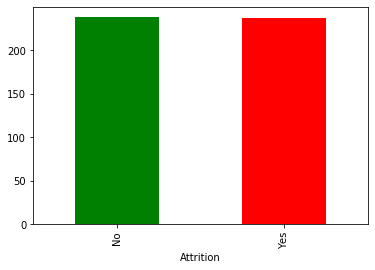

In [10]:
##### EXPLORATORY DATA ANALYSIS (EDA)

df_Groupby = df.groupby("Attrition")
df_Groupby.size().plot(kind="bar",color=['green','red'])
index=[0,1]
labels=['No','Yes']
plt.xticks(index,labels)

([<matplotlib.axis.XTick at 0x2395b51e438>,
 <a list of 3 Text xticklabel objects>)

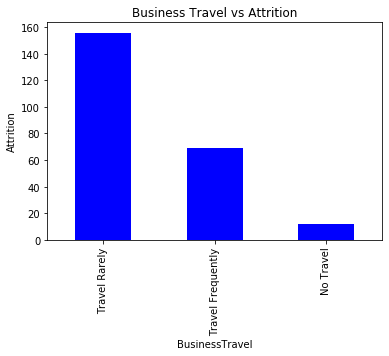

In [12]:
df = df.loc[df["Attrition"]==1]
df_Groupby = df.groupby("BusinessTravel")
df_Groupby.size().plot(kind="bar",color="blue")
plt.title("Business Travel vs Attrition")
plt.xlabel("BusinessTravel")
plt.ylabel("Attrition")
index=[0,1,2]
labels=['Travel Rarely','Travel Frequently','No Travel']
plt.xticks(index,labels)

([<matplotlib.axis.XTick at 0x2395b587828>,
 <a list of 3 Text xticklabel objects>)

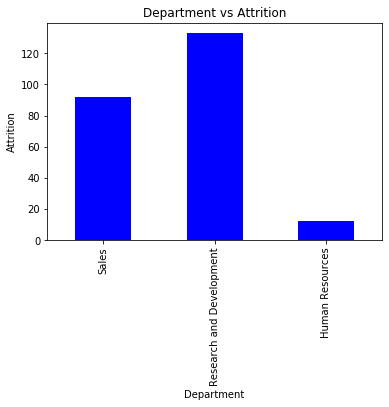

In [13]:
df_Groupby = df.groupby("Department")
df_Groupby.size().plot(kind="bar",color="blue")
plt.title("Department vs Attrition")
plt.xlabel("Department")
plt.ylabel("Attrition")
index=[0,1,2]
labels=['Sales','Research and Development','Human Resources']
plt.xticks(index,labels)


([<matplotlib.axis.XTick at 0x2395b5b90b8>,
 <a list of 4 Text xticklabel objects>)

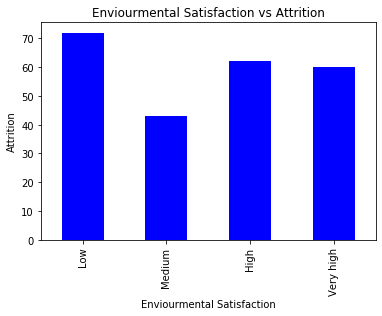

In [14]:
df_Groupby = df.groupby("EnvironmentSatisfaction")
df_Groupby.size().plot(kind="bar",color="blue")
plt.title("Enviourmental Satisfaction vs Attrition")
plt.xlabel("Enviourmental Satisfaction")
plt.ylabel("Attrition")
index=[0,1,2,3]
labels=['Low','Medium','High','Very high']
plt.xticks(index,labels)


Text(0, 0.5, 'Attrition')

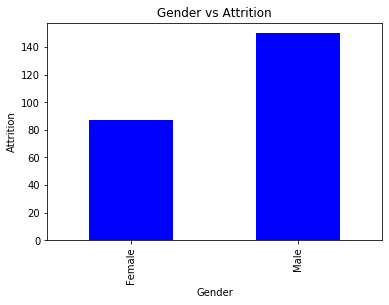

In [15]:
df_Groupby = df.groupby("Gender")
index=[0,1]
labels=['Female','Male']
df_Groupby.size().plot(kind="bar",color="blue")
plt.xticks(index,labels)
plt.title("Gender vs Attrition")
plt.xlabel("Gender")
plt.ylabel("Attrition")


Text(0, 0.5, 'Attrition')

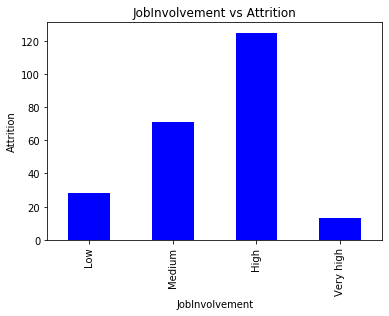

In [16]:
df_Groupby = df.groupby("JobInvolvement")
index=[0,1,2,3]
labels=['Low','Medium','High','Very high']
df_Groupby.size().plot(kind="bar",color="blue")
plt.xticks(index,labels)
plt.title("JobInvolvement vs Attrition")
plt.xlabel("JobInvolvement")
plt.ylabel("Attrition")


Text(0, 0.5, 'Attrition')

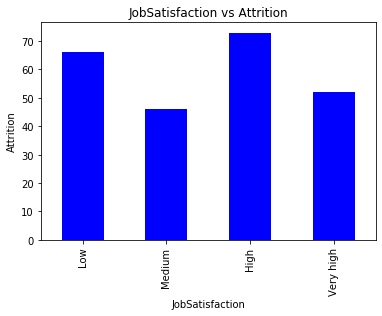

In [17]:
df_Groupby = df.groupby("JobSatisfaction")
index=[0,1,2,3]
labels=['Low','Medium','High','Very high']
df_Groupby.size().plot(kind="bar",color="blue")
plt.xticks(index,labels)
plt.title("JobSatisfaction vs Attrition")
plt.xlabel("JobSatisfaction")
plt.ylabel("Attrition")


Text(0, 0.5, 'Attrition')

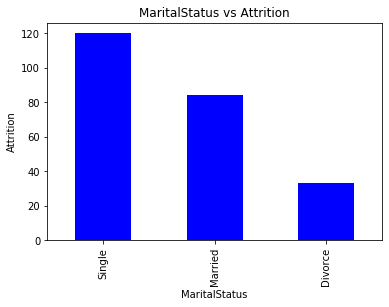

In [18]:
df_Groupby = df.groupby("MaritalStatus")
index=[0,1,2]
labels=['Single','Married','Divorce']
df_Groupby.size().plot(kind="bar",color="blue")
plt.xticks(index,labels)
plt.title("MaritalStatus vs Attrition")
plt.xlabel("MaritalStatus")
plt.ylabel("Attrition")


Text(0, 0.5, 'Attrition')

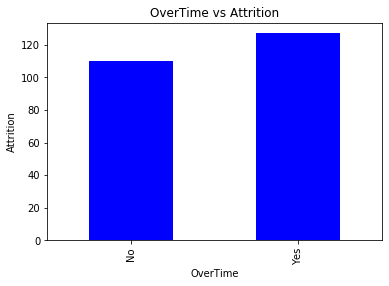

In [19]:
df_Groupby = df.groupby("OverTime")
index=[0,1]
labels=['No','Yes']
df_Groupby.size().plot(kind="bar",color="blue")
plt.xticks(index,labels)
plt.title("OverTime vs Attrition")
plt.xlabel("OverTime")
plt.ylabel("Attrition")


Text(0, 0.5, 'Attrition')

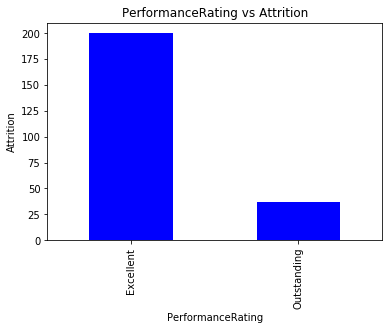

In [20]:
df_Groupby = df.groupby("PerformanceRating")
index=[0,1]
labels=['Excellent','Outstanding']
df_Groupby.size().plot(kind="bar",color="blue")
plt.xticks(index,labels)
plt.title("PerformanceRating vs Attrition")
plt.xlabel("PerformanceRating")
plt.ylabel("Attrition")

Text(0, 0.5, 'Attrition')

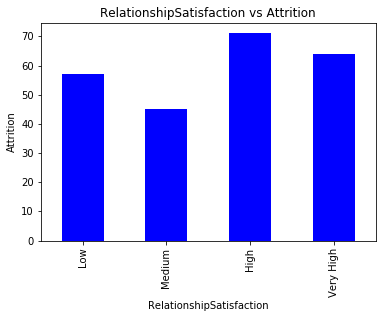

In [21]:
df_Groupby = df.groupby("RelationshipSatisfaction")
index=[0,1,2,3]
labels=['Low','Medium','High','Very High']
df_Groupby.size().plot(kind="bar",color="blue")
plt.xticks(index,labels)
plt.title("RelationshipSatisfaction vs Attrition")
plt.xlabel("RelationshipSatisfaction")
plt.ylabel("Attrition")

Text(0, 0.5, 'Attrition')

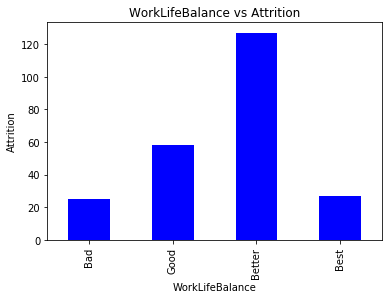

In [22]:
df_Groupby = df.groupby("WorkLifeBalance")
index=[0,1,2,3]
labels=['Bad','Good','Better','Best']
df_Groupby.size().plot(kind="bar",color="blue")
plt.xticks(index,labels)
plt.title("WorkLifeBalance vs Attrition")
plt.xlabel("WorkLifeBalance")
plt.ylabel("Attrition")

In [23]:
df["Age"].max()

58

In [24]:
df["Age"].min()

18

Text(0, 0.5, 'Attrition')

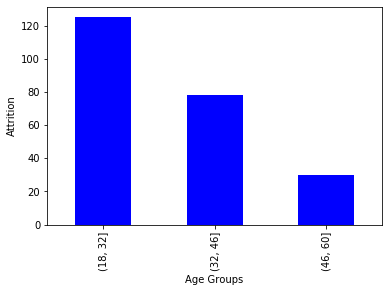

In [25]:
bins = [18,32,46,60]
labels=["1","2","3"]
df_for_bin = df
df_for_bin["Binned"] = pd.cut(df_for_bin["Age"],bins,labels)
df_for_bin.groupby("Binned").size().plot(kind="bar",color="blue")
plt.xlabel("Age Groups")
plt.ylabel("Attrition")

In [26]:
print("Maximum daily rate is : ",df["DailyRate"].max())
print("Minimum daily rate is : ",df["DailyRate"].min())

Maximum daily rate is :  1496
Minimum daily rate is :  103


Text(0, 0.5, 'Attrition')

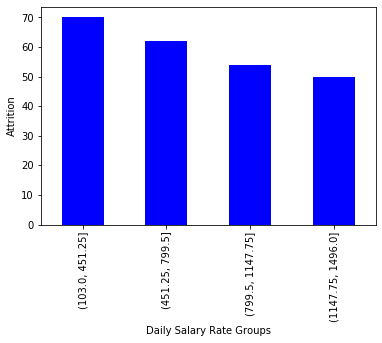

In [27]:
bins = np.linspace(df["DailyRate"].min(),df["DailyRate"].max(),5)
df_for_bin = df
df_for_bin['Binned'] = pd.cut(df_for_bin["DailyRate"],bins)
df_for_bin.groupby(df['Binned']).size().plot(kind="bar",color="blue")
plt.xlabel("Daily Salary Rate Groups")
plt.ylabel("Attrition")

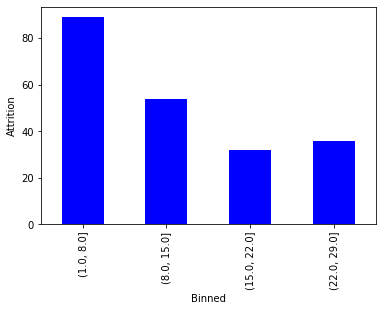

In [28]:
bins = np.linspace(df["DistanceFromHome"].min(),df["DistanceFromHome"].max(),5)
df_for_bin = df
df_for_bin['Binned'] = pd.cut(df_for_bin["DistanceFromHome"],bins)
plt.xlabel("Distance from home")
plt.ylabel("Attrition")
df_for_bin.groupby(df['Binned']).size().plot(kind="bar",color="blue")

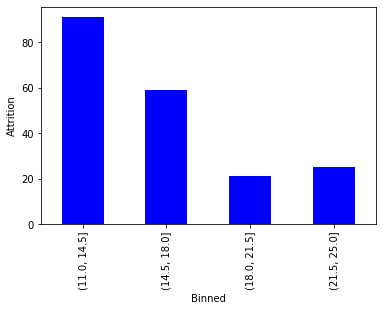

In [29]:
bins = np.linspace(df["PercentSalaryHike"].min(),df["PercentSalaryHike"].max(),5)
df_for_bin = df
df_for_bin['Binned'] = pd.cut(df_for_bin["PercentSalaryHike"],bins)
plt.xlabel("Percent Salary Hike")
plt.ylabel("Attrition")
df_for_bin.groupby(df['Binned']).size().plot(kind="bar",color="blue")

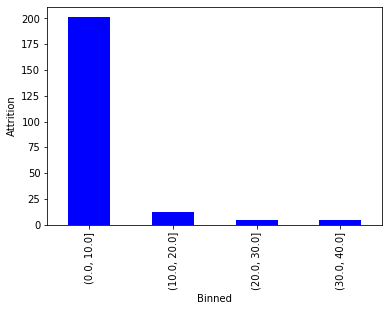

In [30]:
bins = np.linspace(df["YearsAtCompany"].min(),df["YearsAtCompany"].max(),5)
df_for_bin = df
df_for_bin['Binned'] = pd.cut(df_for_bin["YearsAtCompany"],bins)
plt.xlabel("YearsAtCompany")
plt.ylabel("Attrition")
df_for_bin.groupby(df['Binned']).size().plot(kind="bar",color="blue")

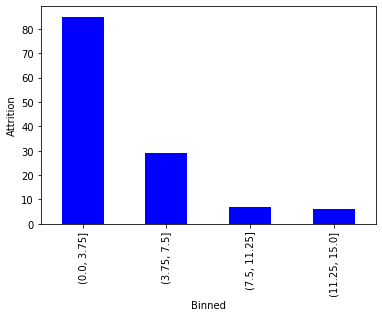

In [31]:
bins = np.linspace(df["YearsSinceLastPromotion"].min(),df["YearsSinceLastPromotion"].max(),5)
df_for_bin = df
df_for_bin['Binned'] = pd.cut(df_for_bin["YearsSinceLastPromotion"],bins)
plt.xlabel("YearsSinceLastPromotion")
plt.ylabel("Attrition")
df_for_bin.groupby(df['Binned']).size().plot(kind="bar",color="blue")

In [32]:
df_Groupby = df.groupby("Attrition")


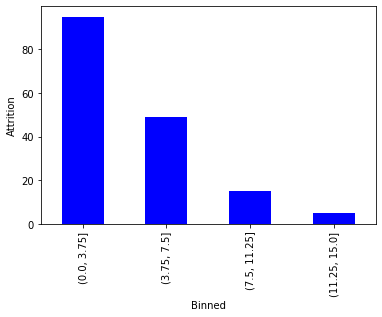

In [33]:
bins = np.linspace(df["YearsInCurrentRole"].min(),df["YearsInCurrentRole"].max(),5)
df_for_bin = df
df_for_bin['Binned'] = pd.cut(df_for_bin["YearsInCurrentRole"],bins)
plt.xlabel("YearsInCurrentRole")
plt.ylabel("Attrition")
df_for_bin.groupby(df['Binned']).size().plot(kind="bar",color="blue")

In [34]:
feature_cols=['Age','BusinessTravel','DailyRate','Department','DistanceFromHome','Education','EducationField','EnvironmentSatisfaction','Gender','HourlyRate','JobInvolvement','JobLevel','JobRole','JobSatisfaction','MaritalStatus','MonthlyIncome','MonthlyRate','NumCompaniesWorked','Over18','OverTime','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StandardHours','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']
X=df2[feature_cols]
y=df2.Attrition

In [35]:
X_test,X_train,y_test,y_train = train_test_split(X,y,test_size=0.30)
X_train.shape


(143, 32)

In [36]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
predict = logreg.predict(X_test)


C:\Users\revat\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [37]:
cnf_matrix = metrics.confusion_matrix(y_test, predict,labels=[0,1])#0 is not attrited and 1 is attrited
cnf_matrix

array([[122,  43],
       [ 68,  99]], dtype=int64)

In [38]:
print("Accuracy:",metrics.accuracy_score(y_test,predict))
print("Precision:",metrics.precision_score(y_test, predict))
print("Recall:",metrics.recall_score(y_test, predict))

Accuracy: 0.6656626506024096
Precision: 0.6971830985915493
Recall: 0.592814371257485


In [40]:
##RANDOM FOREST##

from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(n_estimators=90).fit(X_train,y_train)
rfc = rf.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test,rfc,labels=[0,1])#0 is not attrited and 1 is attrited
cnf_matrix
print("Accuracy:",metrics.accuracy_score(y_test,rfc))
print("Precision:",metrics.precision_score(y_test, rfc))
print("Recall:",metrics.recall_score(y_test, rfc))

Accuracy: 0.6927710843373494
Precision: 0.7304964539007093
Recall: 0.6167664670658682
